In [1]:
import pandas as pd


from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [221]:
auto=pd.read_csv('./auto_insurance/train.csv').drop('id', axis=1)

In [222]:
auto.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## EDA

In [223]:
auto.shape

(381109, 11)

In [224]:
auto.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Convert categorical to numerical 

In [225]:

auto['Gender'] = auto['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [226]:

auto['Vehicle_Damage'] = auto['Vehicle_Damage'].map( {'Yes': 1, 'No': 0} ).astype(int)

## Assigned dummies 

In [227]:
auto=pd.get_dummies(auto, columns=['Vehicle_Age'])

In [228]:
auto.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


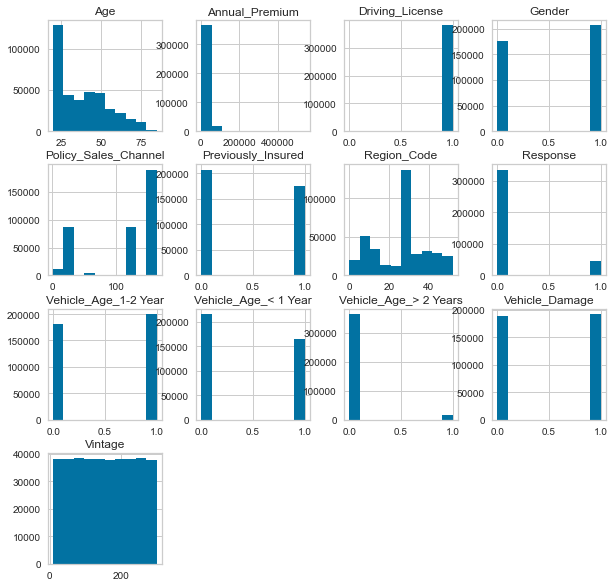

In [229]:
auto.hist(figsize=(10, 10));

In [230]:
auto.shape

(381109, 13)

## Outliers detection and removal

In [231]:
# Removing (statistical) outliers for Annual_Premium
cols = [ 'Age','Annual_Premium'] # one or more

Q1 = auto[cols].quantile(0.25)
Q3 = auto[cols].quantile(0.75)
IQR = Q3 - Q1

auto = auto[~((auto[cols] < (Q1 - 1.5 * IQR)) |(auto[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

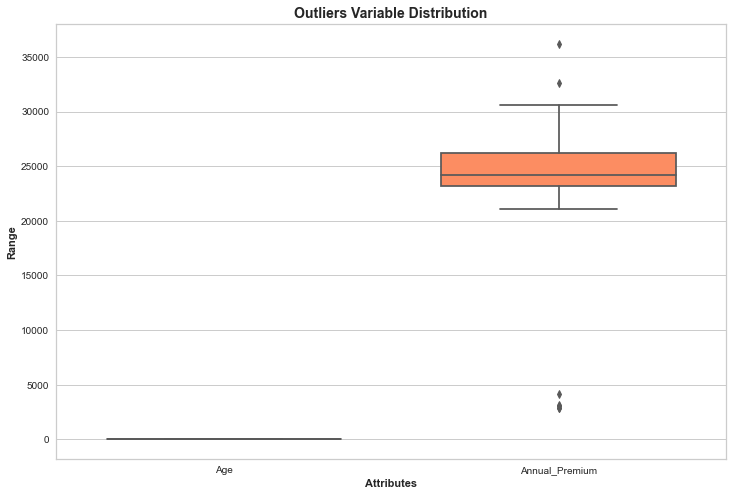

In [232]:
attributes = ['Age','Annual_Premium']
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = X[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [233]:
# Removing (statistical) outliers for Annual_Premium
cols = [ 'Annual_Premium'] # one or more

Q1 = auto[cols].quantile(0.25)
Q3 = auto[cols].quantile(0.75)
IQR = Q3 - Q1

auto = auto[~((auto[cols] < (Q1 - 1.5 * IQR)) |(auto[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

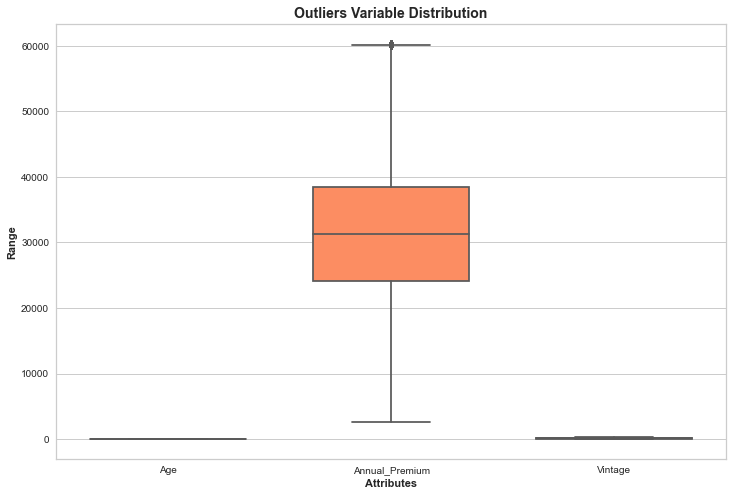

In [234]:
attributes = ['Age','Annual_Premium','Vintage']
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = auto[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [235]:
auto=auto[auto.Response==1]

In [236]:
autoYes=auto.groupby('Region_Code',as_index=False).agg('mean')
autoYes.shape

(53, 13)

In [275]:
X=autoYes.drop(['Driving_License', 'Response'], axis=1)
labels=X.Region_Code

In [276]:
X.shape, labels.shape

((53, 11), (53,))

## Scaling with StandardScaling

In [277]:
scale=StandardScaler()
scaled_X=scale.fit_transform(X)
scaled_X.shape

(53, 11)

In [278]:
from pyclustertend import hopkins
hopkins(scaled_X,50)

0.3241698592991916

In [241]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [279]:
sc=[]
K=range(2,10)
for k in K:
    kmeans=KMeans(n_clusters=k).fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    sc.append(score)

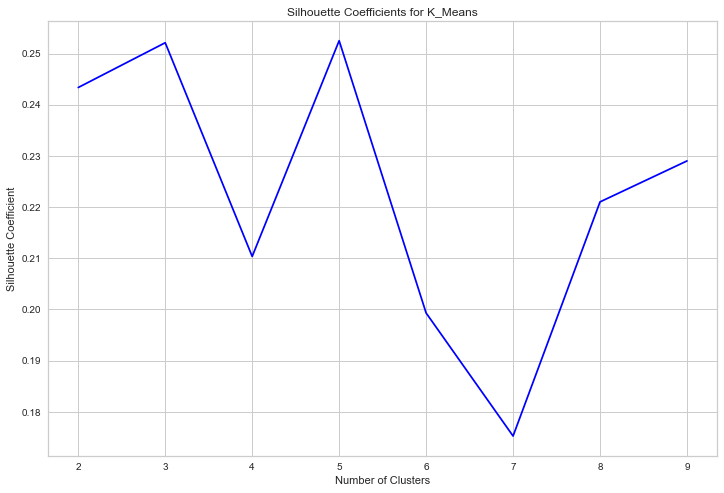

In [319]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(2, 10), sc, color='blue')

ax.set_title('Silhouette Coefficients for K_Means')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Coefficient')
#plt.savefig('./images/Silhouette_score__Yes_customers',dsi=100);

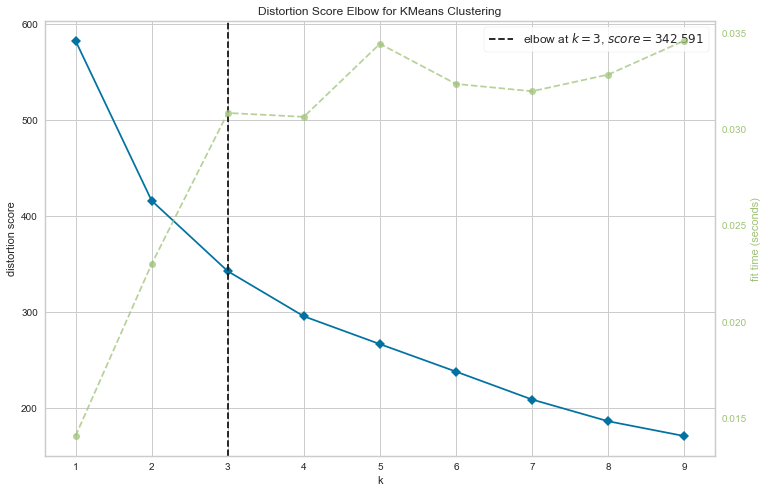

<Figure size 864x576 with 0 Axes>

In [320]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans(random_state=42)
visual=KElbowVisualizer(kmeans, k=(1,10))
visual.fit(scaled_X)
visual.poof()
#plt.savefig('./images/Yellowbrick_score__YES_customers',dsi=100);

In [310]:
km3 = KMeans(n_clusters=3, n_init=20)
km3.fit(scaled_X)

KMeans(n_clusters=3, n_init=20)

In [311]:
km3.labels_

array([1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0,
       1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 2, 1, 0, 2, 1, 1], dtype=int32)

In [312]:
b=pd.Series(km3.labels_)
b.shape

(53,)

In [313]:
km3.cluster_centers_

array([[-0.22708184, -0.41442507, -1.03025014,  0.38919304, -0.70340946,
         0.11667182,  0.91798132,  0.10823699, -1.03213408,  1.11232124,
        -0.61494415],
       [ 0.22880216,  1.22183649,  1.28324659, -0.19065234,  0.78133605,
        -1.29409302, -1.42090845,  1.09935153,  0.35607769, -1.0074578 ,
         1.73875487],
       [ 0.09554376, -0.0731006 ,  0.35803   , -0.22574804,  0.2736189 ,
         0.31292229, -0.2336299 , -0.41735828,  0.64468946, -0.50286312,
        -0.08561923]])

In [286]:
X['ClusterID']=b

In [287]:
X.head()

,Region_Code,Gender,Age,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,ClusterID
0,0.0,0.703488,49.296512,0.005814,1.000000,4159.738372,60.186047,157.924419,0.732558,0.017442,0.250000,2
1,1.0,0.623853,44.779817,0.009174,0.990826,3131.376147,94.000000,157.889908,0.788991,0.110092,0.100917,2
2,2.0,0.651568,37.498258,0.020906,0.972125,25570.641115,117.616725,146.425087,0.630662,0.310105,0.059233,1
3,3.0,0.610213,40.331915,0.006809,0.971064,22951.654468,110.209362,154.451064,0.741277,0.211915,0.046809,0
4,4.0,0.656028,40.471631,0.003546,0.975177,23448.751773,113.780142,155.996454,0.794326,0.152482,0.053191,0


In [288]:
X['Region_Code'] = X['Region_Code'].replace(to_replace=[8,15,28,46,41,0,1,2,3,4,5,6,7,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,47,48,49,50,51,52],
                                                                                value=['Columbia','Iowa','Nevada','Virginia','SDakota','Alabama','Alaska','Arizona','Arkanzas','California','Colorado','Connecticut','Delaware','Florida',
                                                                                'Georgia', 'Hawaii', 'Idaho','Illinois','Indiana','Kansas','Kentucky', 'Luisiana','Maine','Maryland','Massachusetts','Michigan',
                                                                                    'Minnesota','Mississippi', 'Missouri','Monatana','Nebraska','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio',
                                                                                     'Oklahoma','Oregon','Pennsylvania', 'Rhode Island','South Carolina','Tennessee','Texas','Utah','Vermont','Washington','West Virginia','Wisconsin','Wyoming',
                                                                                      'Puerto Rico', 'D.C.'])


# X.rename({8:'W.DC', 15: 'Iowa', 0:'Alabama', 28:'Nevada', 46:'Virginia',41:'SDakota',1:'Alaska',2:'Arizona',3:'Arkanzas',4:'California',5:'Colorado',6:'Connecticut',7:'Delaware', 9:'Florida',
#          10:'Georgia',11: 'Hawaii', 12:'Idaho',13:'Illinois',14:'Indiana',16:'Kansas',17:'Kentucky',18:'Luisiana',19:'Maine',20:'Maryland',21:'Massachusetts',22:'Michigan',23:'Minnesota',24:'Mississippi',25:'Missouri',26:'Monatana',27:'Nebraska',
#          29:'New Hampshire',30:'New Jersey',31:'New Mexico',32:'New York',33:'North Carolina',34:'North Dakota',35:'Ohio',36:'Oklahoma',37:'Oregon',38:'Pennsylvania', 39:'Rhode Island',40:'South Carolina',
#          42:'Tennessee',43:'Texas',44:'Utah',45:'Vermont',47:'Washington',48:'West Virginia',49:'Wisconsin',50:'Wyoming', 51:'Puerto Rico', 52:'D.C.'}, axis='columns',inplace=True)


In [289]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

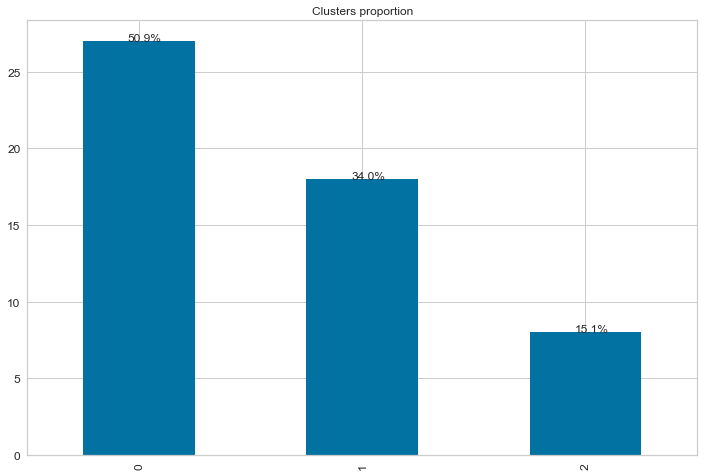

In [328]:
ax=X.ClusterID.value_counts().plot(kind='bar')
#plt.savefig('./images/Cluster_proportion__YES_customers',dsi=100);
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Clusters proportion')
#plt.savefig('./images/Cluster_proportion__YES_customers',dsi=100);
without_hue(ax, X.ClusterID)

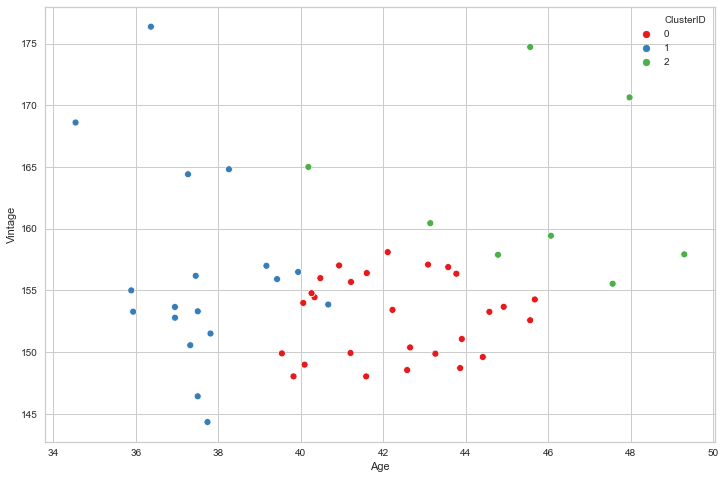

In [291]:
sns.scatterplot(x='Age', y='Vintage', hue='ClusterID', data=X, palette='Set1');

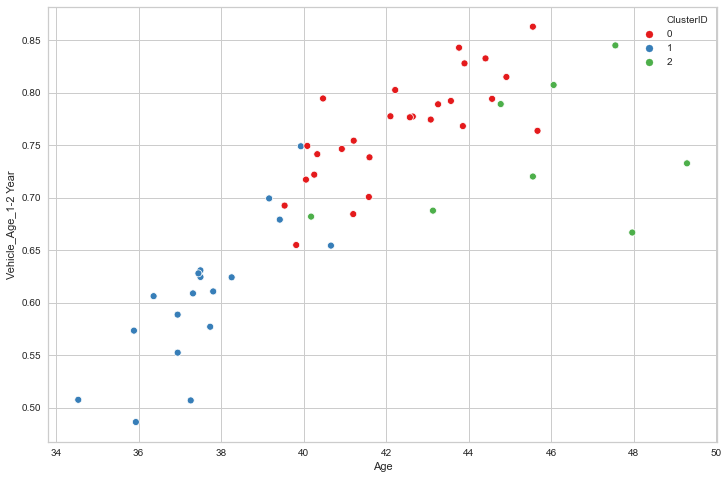

In [292]:
sns.scatterplot(x='Age', y='Vehicle_Age_1-2 Year', hue='ClusterID', data=X, palette='Set1');

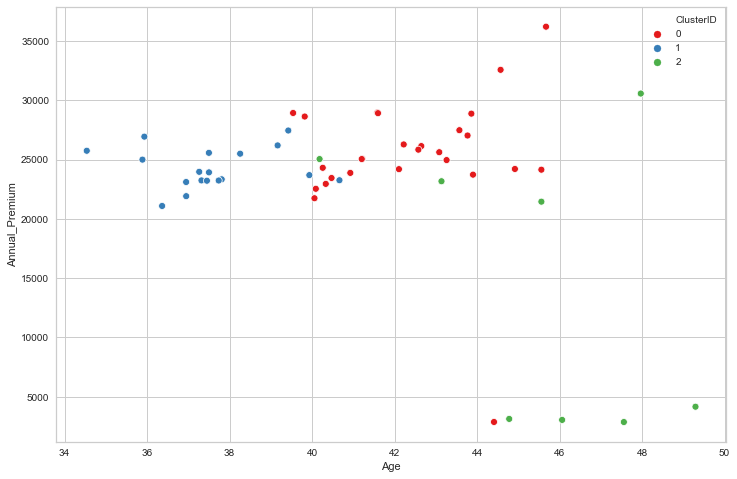

In [293]:
sns.scatterplot(x='Age',y='Annual_Premium', hue='ClusterID', data=X, palette='Set1');

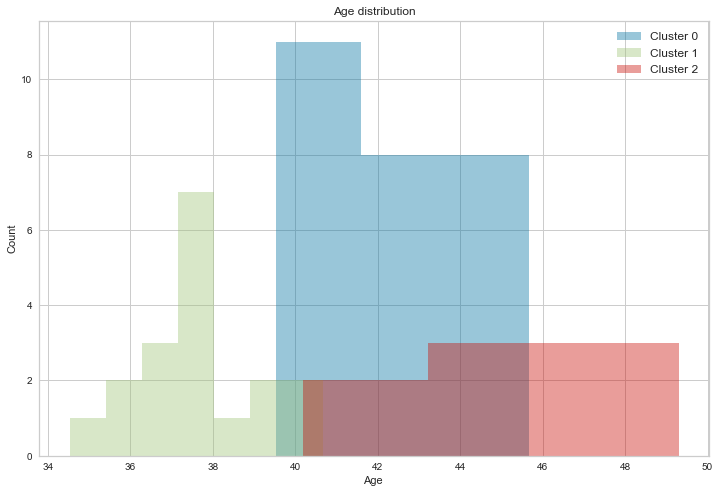

In [296]:
df = X[X.ClusterID == 0]
sns.distplot(df['Age'],  kde=False, label='Cluster 0')

df = X[X.ClusterID==1]
sns.distplot(df['Age'],kde=False, label='Cluster 1')

df = X[X.ClusterID==2]
sns.distplot(df['Age'],kde=False, label='Cluster 2')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Age distribution')
plt.xlabel('Age ')
plt.ylabel('Count');

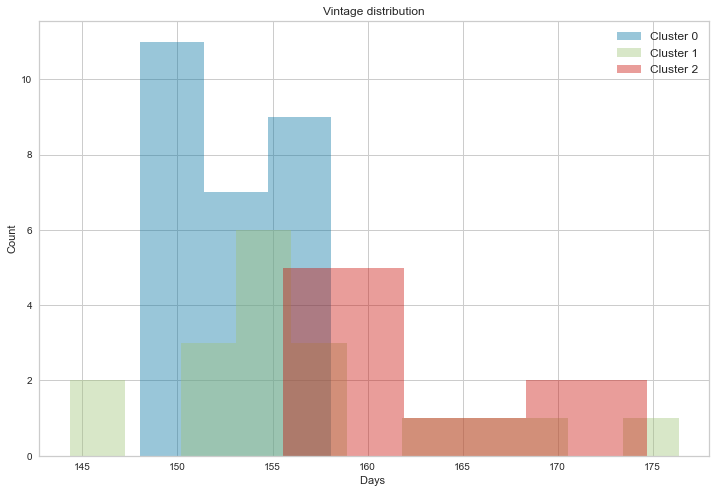

In [298]:
df = X[X.ClusterID == 0]
sns.distplot(df['Vintage'],  kde=False, label='Cluster 0')

df = X[X.ClusterID==1]
sns.distplot(df['Vintage'],kde=False, label='Cluster 1')

df = X[X.ClusterID==2]
sns.distplot(df['Vintage'],kde=False, label='Cluster 2')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Vintage distribution')
plt.xlabel('Days ')
plt.ylabel('Count');

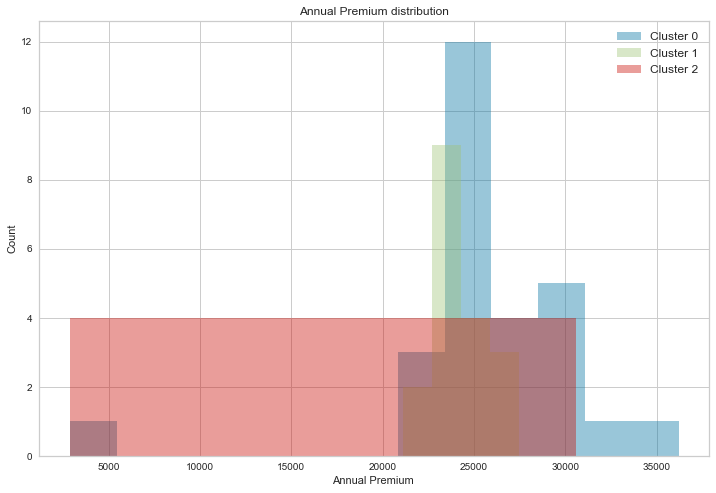

In [301]:
df = X[X.ClusterID == 0]
sns.distplot(df['Annual_Premium'],  kde=False, label='Cluster 0')

df = X[X.ClusterID==1]
sns.distplot(df['Annual_Premium'],kde=False, label='Cluster 1')

df = X[X.ClusterID==2]
sns.distplot(df['Annual_Premium'],kde=False, label='Cluster 2')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Annual Premium distribution')
plt.xlabel('Annual Premium ')
plt.ylabel('Count');

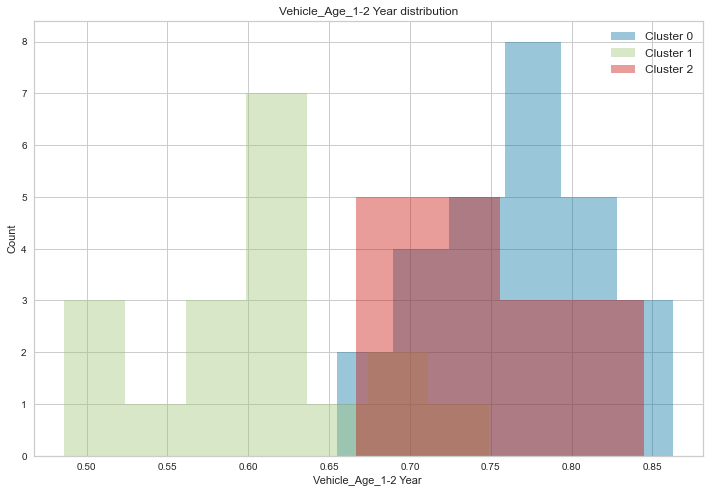

In [306]:
df = X[X.ClusterID == 0]
sns.distplot(df['Vehicle_Age_1-2 Year'],  kde=False, label='Cluster 0')

df = X[X.ClusterID==1]
sns.distplot(df['Vehicle_Age_1-2 Year'],kde=False, label='Cluster 1')

df = X[X.ClusterID==2]
sns.distplot(df['Vehicle_Age_1-2 Year'],kde=False, label='Cluster 2')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Vehicle_Age_1-2 Year distribution')
plt.xlabel('Vehicle_Age_1-2 Year ')
plt.ylabel('Count');

In [263]:
#cluster_0=X[X['ClusterID'] ==0]
X[X['ClusterID'] ==0]['Region_Code'].head()

2         Arizona
5        Colorado
6     Connecticut
10        Georgia
12          Idaho
Name: Region_Code, dtype: object

In [264]:
X[X['ClusterID'] ==1]['Region_Code'].head()

3      Arkanzas
4    California
7      Delaware
8      Columbia
9       Florida
Name: Region_Code, dtype: object

In [266]:
X[X['ClusterID'] ==2]['Region_Code'].head()

0           Alabama
1            Alaska
20         Maryland
31       New Mexico
48    West Virginia
Name: Region_Code, dtype: object

In [258]:
X.head()

,Region_Code,Gender,Age,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,ClusterID
0,Alabama,0.703488,49.296512,0.005814,1.000000,4159.738372,60.186047,0.732558,0.017442,0.250000,2
1,Alaska,0.623853,44.779817,0.009174,0.990826,3131.376147,94.000000,0.788991,0.110092,0.100917,2
2,Arizona,0.651568,37.498258,0.020906,0.972125,25570.641115,117.616725,0.630662,0.310105,0.059233,0
3,Arkanzas,0.610213,40.331915,0.006809,0.971064,22951.654468,110.209362,0.741277,0.211915,0.046809,1
4,California,0.656028,40.471631,0.003546,0.975177,23448.751773,113.780142,0.794326,0.152482,0.053191,1


## Hierarcial clustering

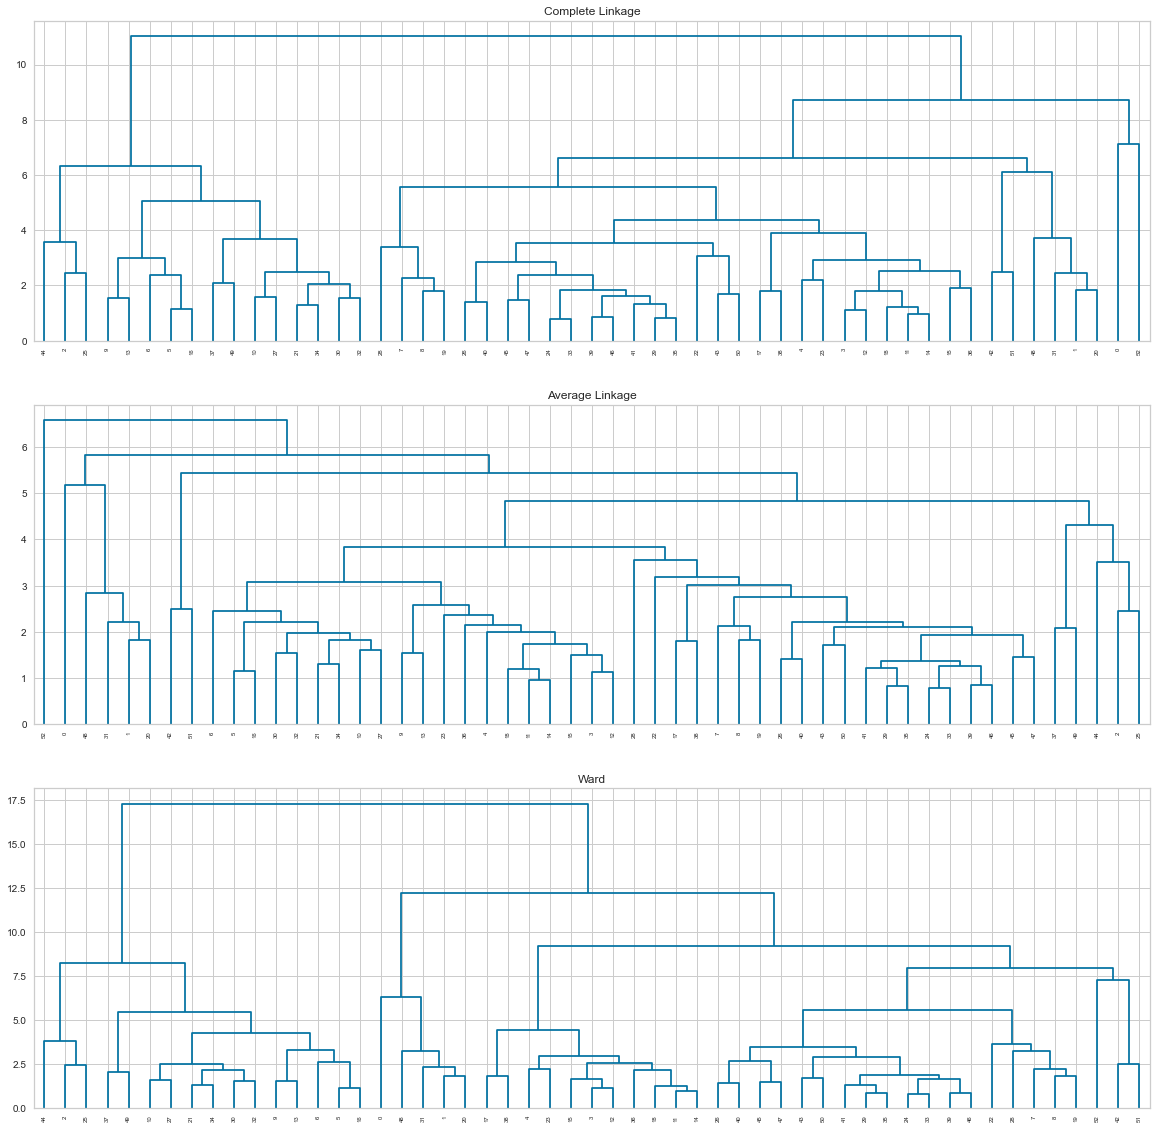

In [259]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(scaled_X), hierarchy.average(scaled_X),hierarchy.ward(scaled_X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage,ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Ward');

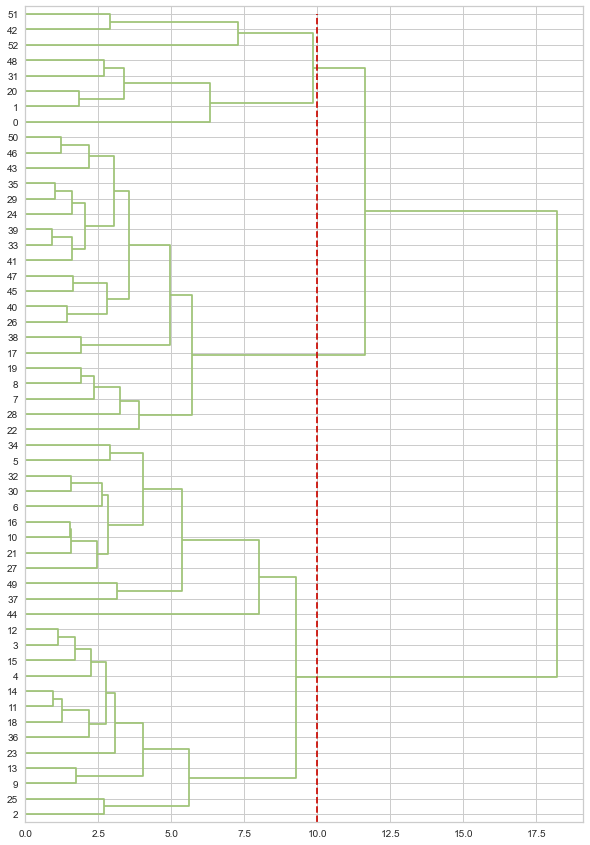

In [329]:
plt.figure(figsize=(10,15))
cut = hierarchy.dendrogram(hierarchy.ward(scaled_X),
                            orientation='right', color_threshold=40, leaf_font_size=10)
plt.vlines(10,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed')
#plt.savefig('./images/ward_dendogram___Yes customers',dsi=100);